In [ ]:
from pytorch_grad_cam import GradCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50
from PIL import Image
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
model = resnet50(pretrained=True)
img = Image.open('../level3-product-serving-level3-cv-07/data/naverboostcamp_train/JPEGImages/00000NBC.jpg')
target_layers = [model.layer4[-1]]
targets = [ClassifierOutputTarget(281)]
cam = GradCAM(model=model, target_layers=target_layers, use_cuda=True)

In [17]:
input_tensor = torch.unsqueeze(transforms.ToTensor()(img),0)

In [17]:
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

100%|██████████| 128/128 [00:36<00:00,  3.53it/s]


In [18]:
# In this example grayscale_cam has only one image in the batch:
grayscale_cam = grayscale_cam[0, :]
visualization = show_cam_on_image(np.array(img)/255., grayscale_cam, use_rgb=True)

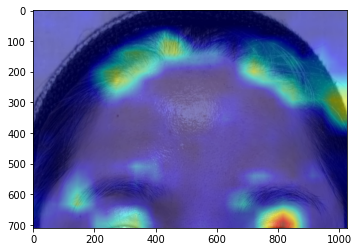

In [12]:
plt.imshow(visualization)